# Data Preprocessing & Exploration
This notebook loads, preprocesses, and explores the Mushroom dataset to prepare it for binary classification using a Decision Tree.

Steps Covered:
- Loading the Mushroom dataset
- Cleaning and encoding categorical features
- Handling missing values using mode imputation
- Performing Exploratory Data Analysis (EDA)
- Splitting the dataset into training (80%), test (18%) and final holdout (2%) sets
- Saving the processed dataset for future use

**Goal:** Prepare the dataset for classification using tree-based methods by ensuring clean and structured input for model training.

**Dataset Used:** secondary_data.csv

In [1]:
# Standard Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from decision_tree import DecisionTree
import pickle



In [2]:
# Load the Dataset

# Define dataset path
dataset_path = "secondary_data.csv"  

# Load dataset with correct delimiter
df = pd.read_csv(dataset_path, delimiter=";")

# Display basic dataset info
print("Dataset loaded successfully!")
df.info()

# Display first few rows
df.head()


Dataset loaded successfully!
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61069 entries, 0 to 61068
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   class                 61069 non-null  object 
 1   cap-diameter          61069 non-null  float64
 2   cap-shape             61069 non-null  object 
 3   cap-surface           46949 non-null  object 
 4   cap-color             61069 non-null  object 
 5   does-bruise-or-bleed  61069 non-null  object 
 6   gill-attachment       51185 non-null  object 
 7   gill-spacing          36006 non-null  object 
 8   gill-color            61069 non-null  object 
 9   stem-height           61069 non-null  float64
 10  stem-width            61069 non-null  float64
 11  stem-root             9531 non-null   object 
 12  stem-surface          22945 non-null  object 
 13  stem-color            61069 non-null  object 
 14  veil-type             3177 non-null   obj

,class,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-height,...,stem-root,stem-surface,stem-color,veil-type,veil-color,has-ring,ring-type,spore-print-color,habitat,season
0,p,15.26,x,g,o,f,e,NaN,w,16.95,...,s,y,w,u,w,t,g,NaN,d,w
1,p,16.60,x,g,o,f,e,NaN,w,17.99,...,s,y,w,u,w,t,g,NaN,d,u
2,p,14.07,x,g,o,f,e,NaN,w,17.80,...,s,y,w,u,w,t,g,NaN,d,w
3,p,14.17,f,h,e,f,e,NaN,w,15.77,...,s,y,w,u,w,t,p,NaN,d,w
4,p,14.64,x,h,o,f,e,NaN,w,16.53,...,s,y,w,u,w,t,p,NaN,d,w


In [3]:
# Data Cleaning & Encoding

## 4.1 Drop unnecessary columns
# Remove features with excessive missing values 
columns_to_drop = ["veil-type", "spore-print-color", "stem-root", "stem-surface", "gill-spacing"]
df = df.drop(columns=columns_to_drop)
print(f"Dropped columns with excessive missing values: {columns_to_drop}")

## 4.2 Encode the target variable
# Convert 'class' into binary: 'p' (poisonous) → 1, 'e' (edible) → 0
df['class'] = df['class'].map({'p': 1, 'e': 0})
print("Target variable encoded successfully (1 = Poisonous, 0 = Edible)")

## 4.3 Encode categorical features
# Identify categorical columns
categorical_cols = df.select_dtypes(include=['object']).columns

# Initialize label encoders dictionary
label_encoders = {}

# Apply label encoding to categorical features
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le  # Store encoder for future reference

print(f"Encoded categorical features: {list(categorical_cols)}")

## 4.4 Handle missing values
# Fill missing values with the mode (most frequent value)
df = df.fillna(df.mode().iloc[0])
print("Handled missing values using mode imputation")

# Display updated dataset info
df.info()


Dropped columns with excessive missing values: ['veil-type', 'spore-print-color', 'stem-root', 'stem-surface', 'gill-spacing']
Target variable encoded successfully (1 = Poisonous, 0 = Edible)
Encoded categorical features: ['cap-shape', 'cap-surface', 'cap-color', 'does-bruise-or-bleed', 'gill-attachment', 'gill-color', 'stem-color', 'veil-color', 'has-ring', 'ring-type', 'habitat', 'season']
Handled missing values using mode imputation
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61069 entries, 0 to 61068
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   class                 61069 non-null  int64  
 1   cap-diameter          61069 non-null  float64
 2   cap-shape             61069 non-null  int64  
 3   cap-surface           61069 non-null  int64  
 4   cap-color             61069 non-null  int64  
 5   does-bruise-or-bleed  61069 non-null  int64  
 6   gill-attachment       61069 non-null  

In [4]:
with open("label_encoders.pkl", "wb") as f:
    pickle.dump(label_encoders, f)


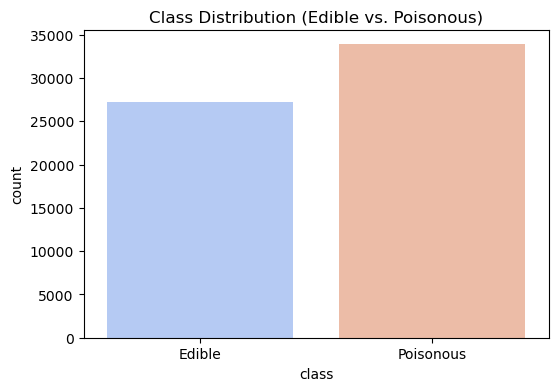

<Figure size 1000x600 with 0 Axes>

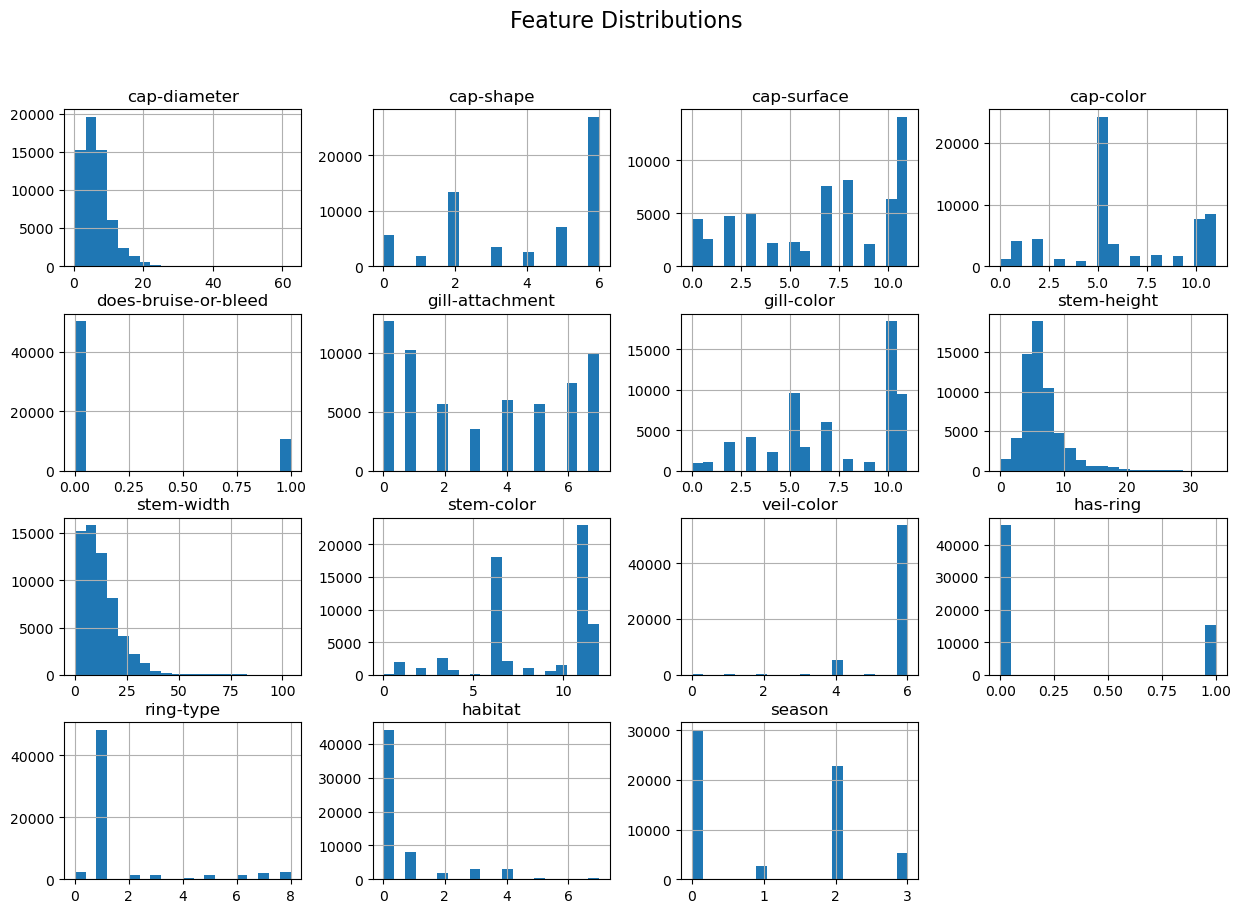

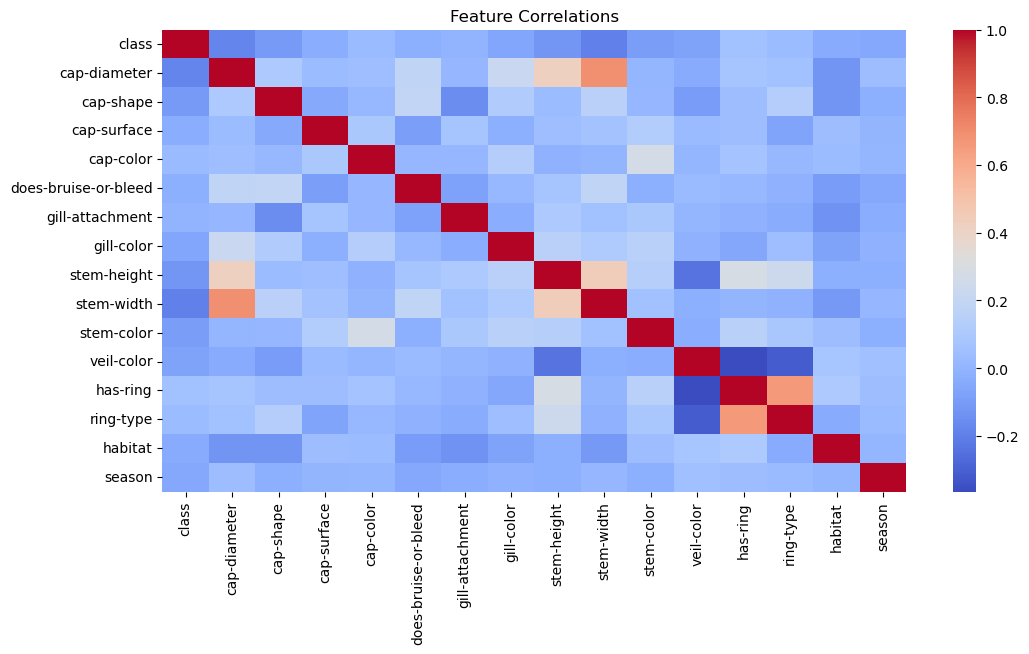

In [5]:
# Exploratory Data Analysis (EDA)

# 5.1 Check class balance
plt.figure(figsize=(6, 4))
sns.countplot(x=df["class"], palette="coolwarm")
plt.title("Class Distribution (Edible vs. Poisonous)")
plt.xticks(ticks=[0, 1], labels=["Edible", "Poisonous"])
plt.show()

# 5.2 Visualize feature distributions
plt.figure(figsize=(10, 6))
df.drop(columns=["class"]).hist(bins=20, figsize=(15, 10))
plt.suptitle("Feature Distributions", fontsize=16)
plt.show()

# 5.3 Display correlation heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(df.corr(), cmap="coolwarm", annot=False)
plt.title("Feature Correlations")
plt.show()


In [6]:
# Train-Test Split

## 6.1 Define feature matrix (X) and target variable (y)
X = df.drop(columns=["class"])  # Remove target column
y = df["class"]  # Target variable (0 = Edible, 1 = Poisonous)

## 6.2 Split the dataset into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

## 6.3 Further split 10% of test set to create a final holdout set
X_test, X_final_test, y_test, y_final_test = train_test_split(
    X_test, y_test, test_size=0.1, random_state=42, stratify=y_test
)

## 6.5 Save the feature names before saving the dataset
feature_names = X_train.columns.tolist()  # Extract feature names
np.save("feature_names.npy", feature_names)  # Save feature names separately

## 6.6 Save the preprocessed dataset as .npy files
np.save("X_train.npy", X_train)
np.save("X_test.npy", X_test)
np.save("y_train.npy", y_train)
np.save("y_test.npy", y_test)
np.save("X_final_test.npy", X_final_test)  # Save final test set
np.save("y_final_test.npy", y_final_test)

print("Preprocessed data and feature names saved successfully, including the final holdout test set!")



Preprocessed data and feature names saved successfully, including the final holdout test set!


In [7]:
# Baseline Model Training (Quick Check)

## 7.1 Train the Decision Tree using the implemented DecisionTree class
decision_tree = DecisionTree(max_depth=10, min_impurity_decrease=0.01, criterion="gini")

## 7.2 Train the model on the training set
decision_tree.fit(X_train.to_numpy(), y_train.to_numpy())

## 7.3 Predict on the test set
y_pred = decision_tree.predict(X_test.to_numpy())

## 7.4 Compute 0-1 loss (misclassification error)
zero_one_loss = (y_pred != y_test.to_numpy()).mean()

## 7.5 Display results
print(f"0-1 Loss (Misclassification Error): {zero_one_loss:.4f}")


0-1 Loss (Misclassification Error): 0.1434
